In [1]:
#Hw5

In [14]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("caret")) install.packages("caret", repos="http://cran.us.r-project.org")
if (not.installed("AppliedPredictiveModeling")) install.packages("AppliedPredictiveModeling", repos="http://cran.us.r-project.org")
if (not.installed("lars")) install.packages("lars", repos="http://cran.us.r-project.org")
if (not.installed("VIF")) install.packages("VIF", repos="http://cran.us.r-project.org")




library(lattice)
library(ggplot2)
library(caret)
library(ISLR)
library(AppliedPredictiveModeling)
library(lars)
library(pls)
library(MASS)
library(VIF)
library(DAAG)
    
#http://beyondvalence.blogspot.com/2014/02/r-partial-least-squares-regression.html
    


Attaching package: ‘DAAG’

The following object is masked from ‘package:VIF’:

    vif

The following object is masked from ‘package:MASS’:

    hills



In [3]:
MY_UID = 123456789 ########## you must enter your UCLA UID here !!!

set.seed( MY_UID )

In [4]:
training_set = data.matrix(read.csv( 'training_set.csv', header=TRUE ))
test_set = data.matrix(read.csv( 'test_set.csv', header=TRUE ))

In [5]:
my.training.set = transform(training_set)
my.test.set = transform(test_set)

In [6]:


#my.test.set.X.transformed$solubility = my.training.set.Y

In [7]:
my.training.set.X = my.training.set
my.training.set.Y = my.training.set$solubility
my.training.set.X$solubility = NULL




#need pre-processing here for training set data.
preProcValues = preProcess(my.training.set.X, c("BoxCox"))
my.training.set.X.transformed = predict(preProcValues, my.training.set.X)
my.training.set.X.transformed$solubility = my.training.set.Y



In [8]:
my.test.set.X = my.test.set
#need pre-processing here for test set data.

preProcValues_testSet = preProcess(my.test.set.X, c("BoxCox"))
my.test.set.X.transformed = predict(preProcValues_testSet, my.test.set.X)

In [9]:
head(my.test.set.X.transformed)

FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,⋯,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
1,1,0,1,1,0,0,1,0,1,⋯,5.483315,0,4,0,0,0,3,0.3741,74.60,74.60
0,1,1,0,1,0,0,1,0,1,⋯,4.324555,0,1,0,0,0,1,-0.2941,20.23,20.23
0,1,0,0,1,0,0,0,0,0,⋯,3.656854,2,0,0,0,0,2,-0.1610,28.68,28.68
0,1,0,0,1,0,0,0,1,0,⋯,2.898979,0,0,0,1,2,1,-0.7102,0.00,0.00
1,0,1,1,0,0,1,0,0,0,⋯,3.291503,0,2,0,0,0,0,-0.7422,26.30,26.30
0,1,0,0,1,0,0,0,1,0,⋯,4.928203,0,0,0,7,7,2,-0.6211,0.00,0.00


In [10]:
plsFit = plsr(solubility ~. , data = my.training.set.X.transformed, validation = "CV")


In [11]:
#validationplot(plsFit, val.type = "RMSEP")


In [12]:
pls.RMSEP = RMSEP(plsFit, estimate = "CV") #another way to find RMSEP + CV
#plot(pls.RMSEP, main="RMSEP PLS Solubility", xlab="components")

In [13]:
#caculate lowest RMSEP value
min = which.min(pls.RMSEP$val)
print(min)

[1] 16


In [16]:
#k-validation graphs
cvResults = suppressWarnings(cv.lm(my.training.set.X.transformed, model, m=5, dots=FALSE, seed=MY_UID, legend.pos="topleft",  printit=FALSE, main="K-folds Validation")) 
 

ERROR: Error in cv.lm(df = my.training.set.X.transformed, form.lm = formula(solubility ~ : unused argument (df = my.training.set.X.transformed)


In [15]:
pls.pred = predict(plsFit,my.training.set.X.transformed, ncomp=min)

In [16]:
print(pls.pred)

, , 16 comps

      solubility
1   -2.294366484
2    0.514771968
3   -1.635546952
4    0.046598288
5   -7.128025117
6   -1.758105464
7   -0.284793876
8   -2.657719620
9   -7.886410775
10  -1.053310488
11  -6.720549640
12  -0.377523864
13  -5.865104893
14  -4.685393496
15  -1.691188250
16  -1.060432682
17  -1.454190415
18  -3.677685342
19  -4.483902351
20  -3.696277408
21   0.135573912
22  -0.522270112
23  -6.335318407
24  -0.820637198
25  -5.063823121
26  -3.434578073
27  -2.452282311
28  -3.110494211
29  -4.201903195
30  -1.460085336
31  -4.928104669
32  -1.329939152
33  -8.040184782
34  -2.793573334
35  -1.648708558
36  -3.981433741
37  -5.364632494
38  -3.670485487
39  -3.751247520
40  -2.338856777
41  -4.766740134
42   0.424252864
43  -1.052263804
44  -2.961519539
45  -0.342008992
46   0.163402114
47  -3.283434972
48  -1.996186490
49  -4.389193419
50  -6.473914748
51  -3.447966092
52  -4.808538299
53  -3.459580345
54  -3.567539457
55  -1.592741850
56  -4.043880919
57  -2.710323069


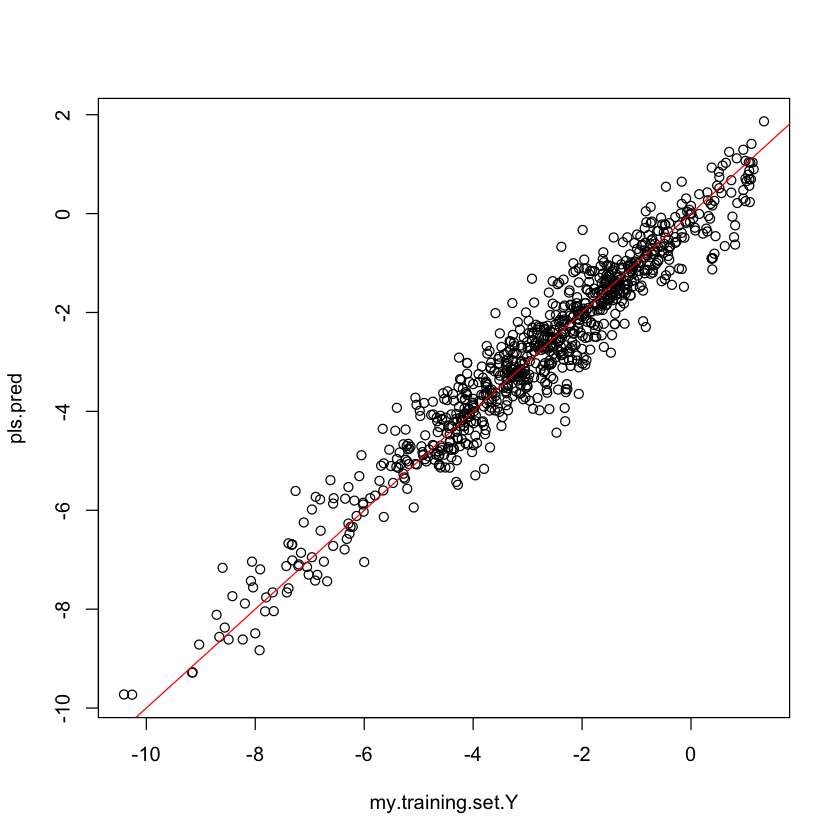

In [17]:
plot(my.training.set.Y, pls.pred)
abline(0,1,col="red")

In [18]:
pls.eval = data.frame(obs=my.training.set.Y, pred=pls.pred[,1,1])

defaultSummary(pls.eval)


RMSE  Rsquared 
0.5404726 0.9296820

In [19]:
pls.testpred = predict(plsFit, my.test.set.X.transformed, ncomp=min)

In [20]:
print(pls.testpred)

, , 16 comps

      solubility
1    -4.16992551
2    -3.50219983
3    -2.29893410
4    -3.94479980
5    -2.62248297
6    -9.41013472
7    -1.99039049
8    -7.78658367
9    -1.18517191
10   -2.75366513
11    0.94961504
12   -3.01837064
13   -4.65492727
14   -3.10545298
15   -1.52957759
16   -2.80779325
17   -3.50219983
18   -3.73580296
19   -1.49195489
20   -5.35295685
21   -1.98056246
22   -3.77740075
23   -2.30279658
24    0.19381524
25   -6.97262394
26   -7.96670539
27   -2.66310373
28   -1.26905763
29   -1.16978559
30   -1.90943061
31   -1.69556505
32   -4.25581974
33   -4.17336941
34   -3.78636744
35   -6.39980815
36   -6.96784843
37   -6.40603616
38   -5.50591575
39   -2.14761189
40   -7.97522154
41   -6.43368091
42   -3.14833196
43   -3.99115158
44   -1.82736642
45   -2.18388806
46   -3.49407816
47   -2.45719504
48   -5.30775497
49   -1.06110164
50   -5.85822312
51   -7.14591930
52   -4.00687486
53   -1.36965356
54   -3.47166921
55   -3.24099494
56   -4.70224437
57   -2.51152696


In [ ]:
###############################################
#linear regression

In [18]:
lm.allpred = lm(solubility ~., data=my.training.set.X.transformed)


mean squared error (lower the better):  0.5681579 


[1] 0.5681579

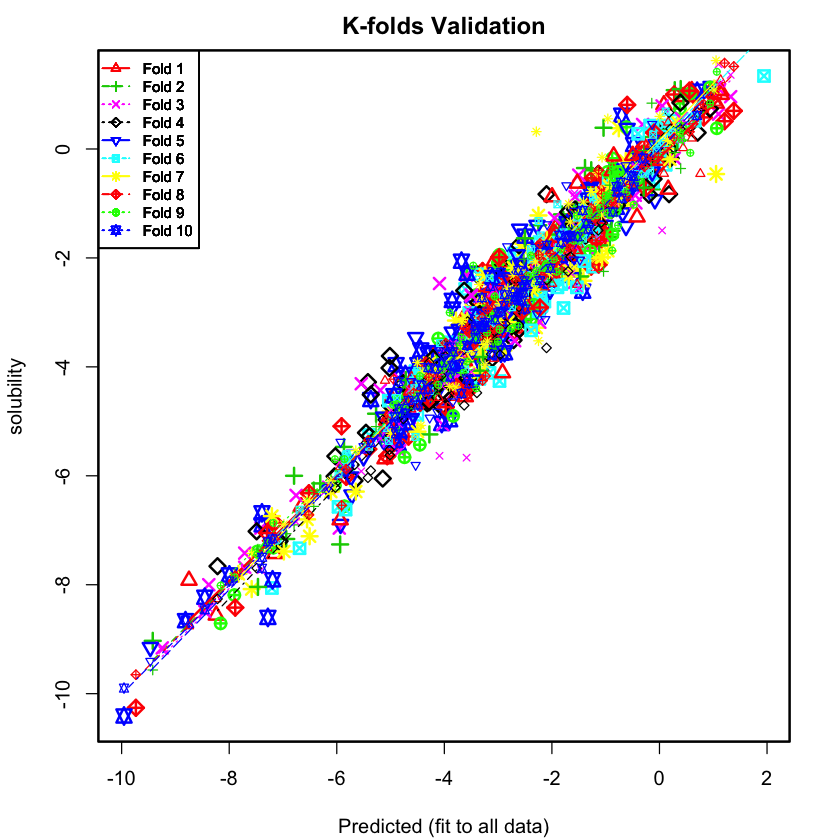

In [24]:
#k-validation graphs
cvResults = suppressWarnings(cv.lm(my.training.set.X.transformed, lm.allpred, m=10, dots=FALSE, seed=MY_UID, legend.pos="topleft",  printit=FALSE, main="K-folds Validation")) 


cat('mean squared error (lower the better): ',attr(cvResults, 'ms'), '\n')

attr(cvResults, 'ms')

In [53]:
print(summary(lm.allpred))


Call:
lm(formula = solubility ~ ., data = my.training.set.X.transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5123 -0.2995  0.0000  0.3031  1.6214 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.2199383  2.2470234   4.103 4.61e-05 ***
FP001              0.0368563  0.3627736   0.102 0.919110    
FP002              0.3252122  0.3000161   1.084 0.278790    
FP003             -0.0297944  0.1486480  -0.200 0.841205    
FP004             -0.2856162  0.1633947  -1.748 0.080952 .  
FP005             -0.2064944  0.3821502  -0.540 0.589149    
FP006              0.6624522  0.2531937   2.616 0.009101 ** 
FP007             -0.1056868  0.1351704  -0.782 0.434582    
FP008             -0.3818236  0.1776238  -2.150 0.031968 *  
FP009              0.0902944  0.4032581   0.224 0.822899    
FP010              0.9584847  0.4019291   2.385 0.017389 *  
FP011             -0.3933865  0.2783597  -1.413 0.158085    
FP012             -0.129

In [30]:
lm.testpred = predict(lm.allpred, my.test.set.X.transformed)

In [31]:
head(lm.testpred)

1          2          3          4          5          6 
-10.037823  -8.170896  -6.687162  -6.928429  -7.128894 -14.737674

In [32]:
#lm.eval = data.frame(obs=my.test.set.Y, pred=lm.testpred)
#defaultSummary(lm.eval)

In [34]:
print(lm.allpred)


Call:
lm(formula = solubility ~ ., data = my.training.set.X.transformed)

Coefficients:
      (Intercept)              FP001              FP002              FP003  
        9.2199383          0.0368563          0.3252122         -0.0297944  
            FP004              FP005              FP006              FP007  
       -0.2856162         -0.2064944          0.6624522         -0.1056868  
            FP008              FP009              FP010              FP011  
       -0.3818236          0.0902944          0.9584847         -0.3933865  
            FP012              FP013              FP014              FP015  
       -0.1290801         -0.4717433         -0.0830091          0.0665880  
            FP016              FP017              FP018              FP019  
       -0.1322801         -0.2307725         -0.3714165         -0.8814563  
            FP020              FP021              FP022              FP023  
        0.1547926         -0.0949980          0.0988150         

In [21]:
#using train() for linear regression
fitControl = trainControl(#10-fold CV
                         method = "repeatedcv",
                         number = 10,
                          ## repeated ten times
                         repeats = 10)

In [33]:
lm_Fit1 = suppressWarnings(train(solubility ~ ., data=my.training.set.X.transformed, 
                 method = "lm", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = TRUE))
lm_Fit1

Linear Regression 

855 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 768, 768, 770, 770, 769, 770, ... 
Resampling results:

  RMSE      Rsquared
  0.766347  0.861789

Tuning parameter 'intercept' was held constant at a value of TRUE

In [34]:
lm.test_pred = predict(lm_Fit1, my.test.set.X.transformed)

In [35]:
head(lm.test_pred)

1          2          3          4          5          6 
-10.037823  -8.170896  -6.687162  -6.928429  -7.128894 -14.737674

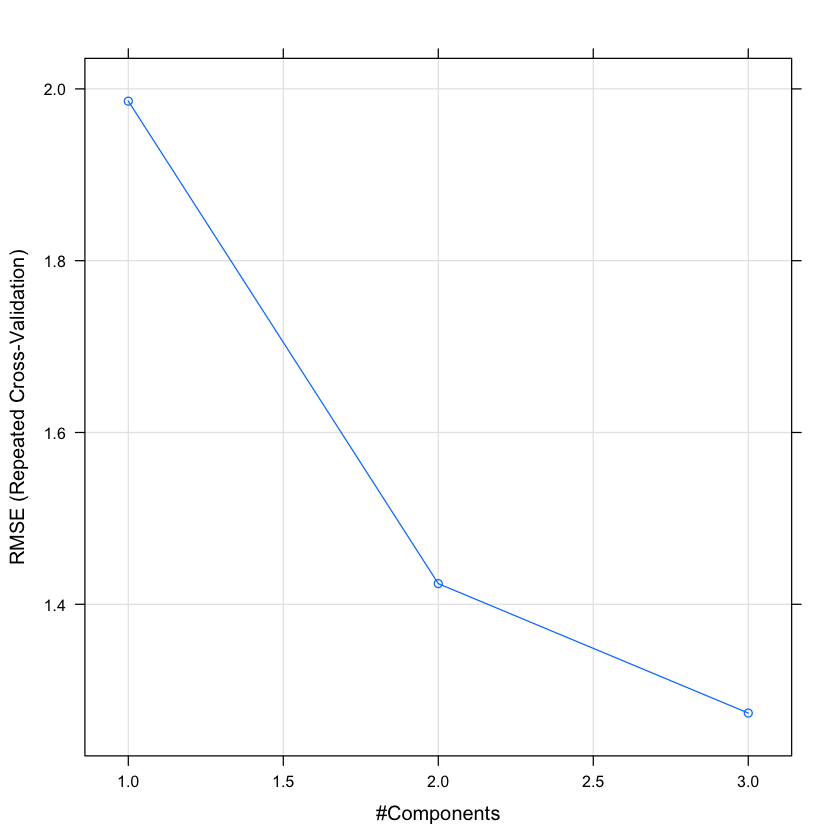

In [41]:
plot(lm_Fit1)

In [40]:
#using train() for partial least squares regression
pls_Fit1 = suppressWarnings(train(solubility ~ ., data=my.training.set.X.transformed, 
                 method = "pls", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = TRUE))
pls_Fit1

Partial Least Squares 

855 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 770, 769, 769, 769, 770, 770, ... 
Resampling results across tuning parameters:

  ncomp  RMSE      Rsquared 
  1      1.985860  0.0565684
  2      1.423977  0.5145534
  3      1.270804  0.6147438

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was ncomp = 3.